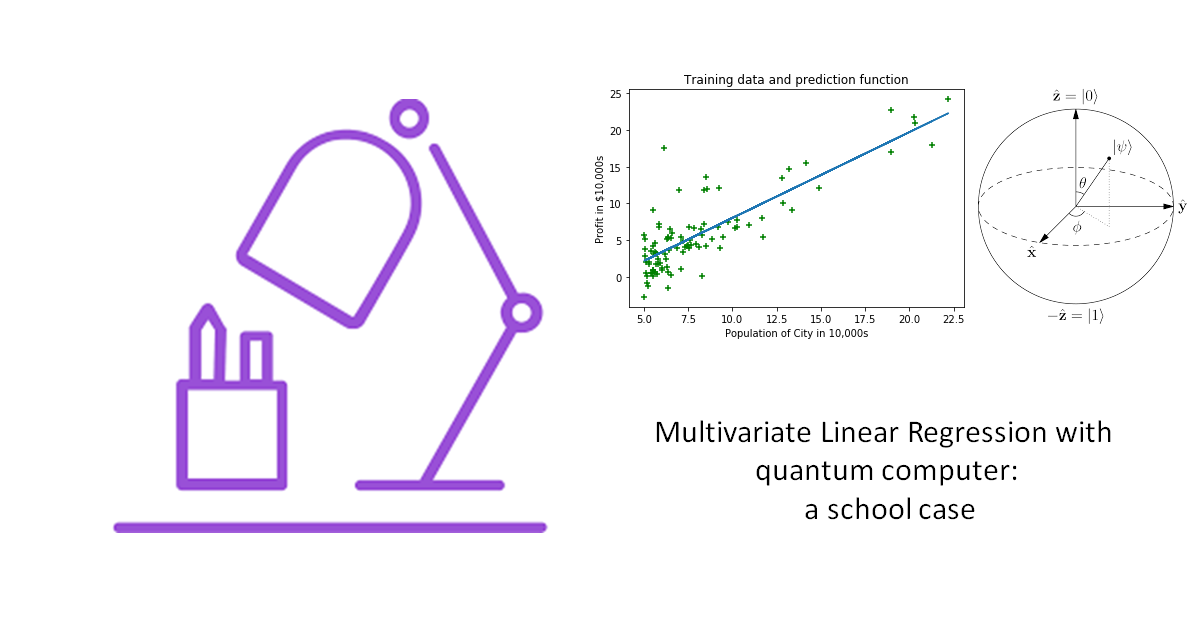
## This example is composed of two sections: 

## In the first one a Watson Studio based application of multivariate linear regression with the two traditional approaches of Gradient Descent and Normal Solution is reported 

## In the second one a variation of the Normal Solution by using Quantum Computing capabilities is reported 

## The purpose is to provide a simple example of one of the most common ML application by introducing the innovative usage of Quantum Computer (provided by IBM) even without computation advantage

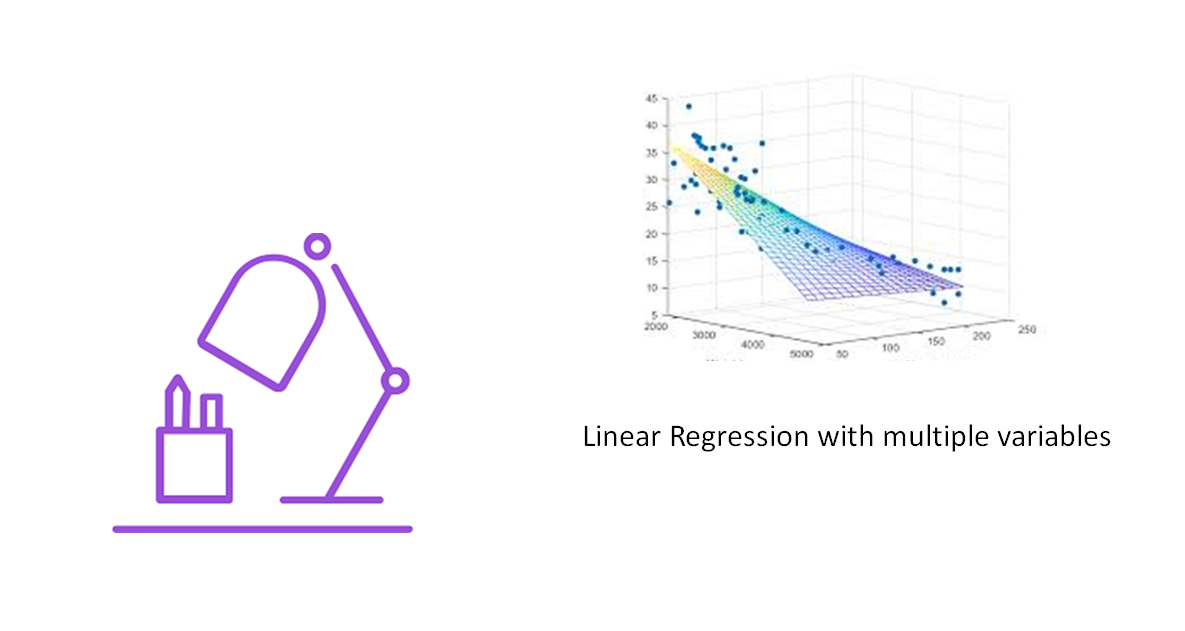
## Section 1 - In this example, we will implement linear regression with multiple variables.

by Ennio Picarelli based on the Andrew Ng Stanford University Machine Learning course 

In this example we show the way to calculate (with classical computation) the multivariate linear regression, that is to say, to find a prediction function in the case the outputs (i.e. the price of a house) depend on more than one $x$ variable (i.e the house extension in square feet and the number of rooms).

In the exercise we will refer to the two variables: square_feet and rooms_number 


In [1]:
    #!pip install pixiedust
    #import pixiedust
    import matplotlib.pyplot as plt
    import numpy as np


## We are looking for a function 

$$ h_θ(x) = θ_0 + θ_1x_1 + θ_2x_2$$ 

able to make the prediction, where $θ_0$, $θ_1$ and $θ_2$ are the paramethers to be found. 

## We upload the csv training data set and automatically generate the code to read it

We will use the dataset ex1data2.csv in which the first column is feet_sq, the second is room_nb, the third is the price.

By using the Watson Studio capabilities we can automatically generate the code necessary to read a csv file into an array.
The data are loaded in the array df_data_1 and we can assign to the X and y variables the two columns.

In [2]:
import sys
import types
import pandas as pd
from ibm_botocore.client import Config
import ibm_boto3

def __iter__(self): return 0

# @hidden_cell
# The following code accesses a file in your IBM Cloud Object Storage. It includes your credentials.
# You might want to remove those credentials before you share your notebook.
client_6e66e2db78b04f06a0fb0a77e04e36f5 = ibm_boto3.client(service_name='s3',
    ibm_api_key_id='c-XvXnUYEDK6D9_FLsF0UsEKMJhaXv3NhZHxOFQrglki',
    ibm_auth_endpoint="https://iam.bluemix.net/oidc/token",
    config=Config(signature_version='oauth'),
    endpoint_url='https://s3.eu-geo.objectstorage.service.networklayer.com')

body = client_6e66e2db78b04f06a0fb0a77e04e36f5.get_object(Bucket='prova-donotdelete-pr-htwa8abspyrjpu',Key='ex1data2.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

df_data_1 = pd.read_csv(body)
df_data_1.head()

Xini=df_data_1.values[:,0:2]
y=df_data_1.values[:,2]
print(Xini)


[[2104    3]
 [1600    3]
 [2400    3]
 [1416    2]
 [3000    4]
 [1985    4]
 [1534    3]
 [1427    3]
 [1380    3]
 [1494    3]
 [1940    4]
 [2000    3]
 [1890    3]
 [4478    5]
 [1268    3]
 [2300    4]
 [1320    2]
 [1236    3]
 [2609    4]
 [3031    4]
 [1767    3]
 [1888    2]
 [1604    3]
 [1962    4]
 [3890    3]
 [1100    3]
 [1458    3]
 [2526    3]
 [2200    3]
 [2637    3]
 [1839    2]
 [1000    1]
 [2040    4]
 [3137    3]
 [1811    4]
 [1437    3]
 [1239    3]
 [2132    4]
 [4215    4]
 [2162    4]
 [1664    2]
 [2238    3]
 [2567    4]
 [1200    3]
 [ 852    2]
 [1852    4]
 [1203    3]]


## We initialize θ and modify the X array for the "Cost Function" evaluation 

The cost function is defined as the squared error function calculated between the function evaluation $ h_θ(x)$ and the training data y and its meaning is a calculation of the difference between evaluated and measured y data. 
The purpose is to minimize this difference.
In multi-variable case we preliminarly need to normalize data.
What does it mean?

The features $(x_i)$ can be very different in scale; it means that the $J(\theta)$ function can be very stretched in the direction of the largest scale feature.
In order to prevent that it is preferred to normalize data, trying to mantain the features $x_i$ in the range $-1\leq x_i \leq 1$.
In order to do this, we subtract to each $x_i$ value the mean of all $x_i$ values and divide by the standard deviation of $x_i$ data.

$$x_i normalized = \frac{x_i-\mu_i}{S_i}$$

where

$\mu_i=\frac{1}{m}\sum_{i=1}^{m}x_i$

and

$S_i=\sqrt\frac{\sum_{i=1}^{m}x_i-\mu_i}{m}$

this can be easily done by using the numpy functions np.mean and np.std.

Afterwards, we add a 'ones' column before the normalized X value and set to 0 the $\theta$ values. 
In order to add the column after having set it to 'ones' by means of the np.ones function, we use the instruction column_stack.

We do also set, the learning ratio $alpha.

This parameter is critical because:

a) if you choose it too small you can have a small convergence

b) if you choose it too big $J(\theta)$ may not decrease on every iteration and may not converge at all

In this example we suggest you to check the results varying the values of $\alpha$ starting from $0.01$ and then increasing this value each time multiplying by $3$ the previous one $(0.01, 0.03, 0.1, 0.3)$

## Be careful 
In the reading phase, the data variable could be set to an integer data type (instead of real) and so when you normalize its value it can be rounded to integer.
To prevent that we initialize a new vector to zeros and use it to make the calculation.
In this case this new array is defined as real.

In [3]:
X = np.zeros([np.size(Xini,0),2])
print(np.size(X,1))

mu = np.zeros([1, np.size(Xini,1)])
mu = np.transpose(mu)

sigma = np.zeros([1, np.size(Xini,1)])
sigma = np.transpose(sigma)
lunghezza=len
mu[0]=sum(Xini[:,0])
mu[0]=mu[0]/len(Xini[:,0])
mu[1]=sum(Xini[:,1])
mu[1]=mu[1]/len(Xini[:,1])

sigma[0]=np.std(Xini[:,0])
sigma[1]=np.std(Xini[:,1])

X[:,0] = (Xini[:,0]-mu[0])/sigma[0]
X[:,1] = (Xini[:,1]-mu[1])/sigma[1]


z = np.ones([len(X[:,0]),1])

X=np.column_stack((z, X))
print ('X=',X)

theta = np.zeros([3])# initialize fitting parameters

print(theta)

# Some gradient descent settings
iterations = 50
alpha = 0.15

2
X= [[  1.00000000e+00   1.31415422e-01  -2.26093368e-01]
 [  1.00000000e+00  -5.09640698e-01  -2.26093368e-01]
 [  1.00000000e+00   5.07908699e-01  -2.26093368e-01]
 [  1.00000000e+00  -7.43677059e-01  -1.55439190e+00]
 [  1.00000000e+00   1.27107075e+00   1.10220517e+00]
 [  1.00000000e+00  -1.99450507e-02   1.10220517e+00]
 [  1.00000000e+00  -5.93588523e-01  -2.26093368e-01]
 [  1.00000000e+00  -7.29685755e-01  -2.26093368e-01]
 [  1.00000000e+00  -7.89466782e-01  -2.26093368e-01]
 [  1.00000000e+00  -6.44465993e-01  -2.26093368e-01]
 [  1.00000000e+00  -7.71822042e-02   1.10220517e+00]
 [  1.00000000e+00  -8.65999486e-04  -2.26093368e-01]
 [  1.00000000e+00  -1.40779041e-01  -2.26093368e-01]
 [  1.00000000e+00   3.15099326e+00   2.43050370e+00]
 [  1.00000000e+00  -9.31923697e-01  -2.26093368e-01]
 [  1.00000000e+00   3.80715024e-01   1.10220517e+00]
 [  1.00000000e+00  -8.65782986e-01  -1.55439190e+00]
 [  1.00000000e+00  -9.72625673e-01  -2.26093368e-01]
 [  1.00000000e+00   7.

## We calculate the parametrized Cost Function 
We use a function just because this piece of code will be called many times in a loop in different parts of the calculation flow.
The squared error function is defined as follow 
$$ J(θ_0,θ_1,..)= J(θ) =\frac{1}{2m}\sum_{i=1}^{m} (h_θ(x_i)-y_i)^2$$
If we consider the value of $h_θ(x)$ function the previous expression becomes:
$$ J(θ_0,θ_1,...)= J(θ) =\frac{1}{2m}\sum_{i=1}^{m} (Xθ-y_i)^2$$
Where $X$ is a matrix mx3 (in this case) and $\theta$ is a vector 3x1. By multiplying these two matrices we obtain a mx1 vector that we can subtract from the y vector.
This is the function we have to minimize.

In [4]:
#COMPUTECOST Compute cost for linear regression
#   J = COMPUTECOST(X, y, theta) computes the cost of using theta as the
#   parameter for linear regression to fit the data points in X and y

# Initialize some useful values
def computeCost(x, y, theta):
    m = len(y); # number of training examples

# You need to return the following variables correctly 
    J = 0;

# Instructions: Compute the cost of a particular choice of theta
#               You should set J to the cost.

    Jtmp=sum((np.dot(X,theta)-y)**2)

    J = 1 / (2 * m) * Jtmp

    return J
computeCost(X, y, theta)

65591548106.457443

## We write the Gradient Descent algorithm in the multi-variable version

It remains valid that: 

$$\theta_j := \theta_j - \alpha \frac {\partial J(\theta_0,\theta_1)}{\partial \theta_j} $$

$\alpha$ is still the learning rate we set before the value to 0.01, but we must repeat the calculation with different values in order to find the right one.

## How to parametrize
the update of $theta_0$ and $\theta_1$ must be simultaneous:

$temp_i := \theta_i -  \alpha \frac {\partial J(\theta)}{\partial \theta_i}$

$\theta_i:=\theta_i- \alpha\frac{1}{m}\sum_{j=1}^{m} (h_θ(x_i^{(j)})-y_i^{(j)})x_i^{(j)}$

then

$\theta_i := temp_i$


In [5]:
#function [theta, J_history] = gradientDescent(X, y, theta, alpha, num_iters)
#GRADIENTDESCENT Performs gradient descent to learn theta
#   theta = GRADIENTDESENT(X, y, theta, alpha, num_iters) updates theta by 
#   taking num_iters gradient steps with learning rate alpha

# Initialize some useful values
m = len(y); # number of training examples

num_iters=iterations
theta1 = np.zeros([3])
a=theta1
J_history = np.zeros(num_iters)

for iter in range(num_iters):


    # Perform a single gradient step on the parameter vector
    #      theta. 
    #
    # Hint: While debugging, it can be useful to print out the values
    #       of the cost function (computeCost) and gradient here.
    #
    
    for ii in range(np.size(X,1)):
        Gtmp=np.dot(X,theta1)-y
        a[ii]=theta1[ii] - (alpha / m )* (np.dot(np.transpose(Gtmp),X[:,ii]))
    #    print('iter,aii',iter,a[ii])
    for jj in range(np.size(X,1)):
        theta1[jj] = a[jj]
        print('iter,theta',iter,theta1[jj])
    
    # ============================================================

    # Save the cost J in every iteration    
    J_history[iter] = computeCost(X, y, theta1)
    

iter,theta 0 51061.8989362
iter,theta 0 15864.6200239
iter,theta 0 6873.77322498
iter,theta 1 94464.5130319
iter,theta 1 28772.1839078
iter,theta 1 11632.3085968
iter,theta 2 131356.735013
iter,theta 2 39343.9196469
iter,theta 2 14789.0898668
iter,theta 3 162715.123697
iter,theta 3 48064.7409276
iter,theta 3 16739.8478595
iter,theta 4 189369.754079
iter,theta 4 55313.5849414
iter,theta 4 17789.1249157
iter,theta 5 212026.189903
iter,theta 5 61386.9682421
iter,theta 5 18170.8760933
iter,theta 6 231284.160354
iter,theta 6 66517.2788267
iter,theta 6 18064.443743
iter,theta 7 247653.435237
iter,theta 7 70886.9826176
iter,theta 7 17606.9426229
iter,theta 8 261567.318888
iter,theta 8 74639.6586832
iter,theta 8 16902.860342
iter,theta 9 273394.119991
iter,theta 9 77888.572787
iter,theta 9 16031.4976011
iter,theta 10 283446.900928
iter,theta 10 80723.3399589
iter,theta 10 15052.7327741
iter,theta 11 291991.764725
iter,theta 11 83215.1034856
iter,theta 11 14011.4867927
iter,theta 12 299254.8989

## We obtained the $\theta$ values 


We can also make a prediction 

In [6]:
# print theta to screen

print('Theta found by gradient descent: ')
print('', theta1[0], theta1[1], theta1[2])

# Estimate the price of a 1650 sq-ft, 3 br house
price = theta1[0]+theta1[1]*(1650-mu[0])/sigma[0]+theta1[2]*(3-mu[1])/sigma[1];
print('Predicted price of a 1650 sq-ft, 3 br house (using gradient descent):', price)


Theta found by gradient descent: 
 340311.977539 107880.128084 -5066.00738435
Predicted price of a 1650 sq-ft, 3 br house (using gradient descent): [ 293338.0994252]


## We plot the $J$ function versus the number of iterations for a given $\alpha$ 

Plotting Data ...


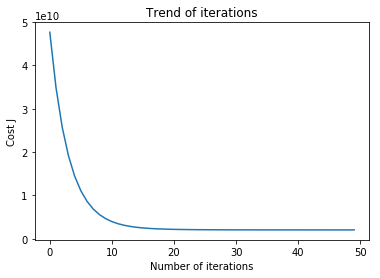

In [7]:
from matplotlib.pyplot import subplots, show
print('Plotting Data ...')

fig, ax = subplots()
a=np.arange(0,np.size(J_history))

ax.plot(a,J_history)
ax.set_title("Trend of iterations")
ax.set_xlabel("Number of iterations")
ax.set_ylabel("Cost J")
show()

## Alternative way: the Normal Solution

From matrix algebra, we know that

$ \sum_{i=1}^{m} (h_θ(x_i)-y_i)^2 = (X\theta-y)^T(X\theta-y)$

So we can now define the cost function as,

$ J(θ)= \frac{1}{2m}\sum_{i=1}^{m} (h_θ(x_i)-y_i)^2 = \frac{1}{2m}(X\theta-y)^T(X\theta-y)$

To find out the value of $\theta$  which minimizes $J(\theta)$, we can differentiate with respect to $\theta$

$\frac{\partial}{\partial\theta}J(\theta)=\frac{1}{2m}\frac{\partial}{\partial\theta}(X\theta-y)^T(X\theta-y)$

$=\frac{1}{2m}\frac{\partial}{\partial\theta}(\theta^TX^TX\theta-\theta^TX^Ty-y^TX\theta+y^Ty)$

$=\frac{1}{m}(X^TX\theta-X^Ty)$


To find out the value of  $\theta$ which minimizes $J(\theta)$,  we set

$\frac{\partial}{\partial\theta}J(\theta)=0$

$\frac{1}{m}(X^TX\theta-X^Ty)=0$

Solving,

$\theta=(X^TX)^-1X^Ty$

Now we write the related algorithm (in this case the X must not be normalized)

In [8]:
def __iter__(self): return 0

#  Being this approach alternative, we reload the data in order to make this piece of code directly executable   

# @hidden_cell
# The following code accesses a file in your IBM Cloud Object Storage. It includes your credentials.
# You might want to remove those credentials before you share your notebook.
client_6e66e2db78b04f06a0fb0a77e04e36f5 = ibm_boto3.client(service_name='s3',
    ibm_api_key_id='c-XvXnUYEDK6D9_FLsF0UsEKMJhaXv3NhZHxOFQrglki',
    ibm_auth_endpoint="https://iam.bluemix.net/oidc/token",
    config=Config(signature_version='oauth'),
    endpoint_url='https://s3.eu-geo.objectstorage.service.networklayer.com')

body = client_6e66e2db78b04f06a0fb0a77e04e36f5.get_object(Bucket='prova-donotdelete-pr-htwa8abspyrjpu',Key='ex1data2.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

df_data_1 = pd.read_csv(body)
df_data_1.head()
X=df_data_1.values[:,0:2]*1.
y=df_data_1.values[:,2]*1.

m=len(y)
# we can rescale the price dividing by 1000. and so expressing the price as k$
X[:,0]=X[:,0]/1000.

z = np.ones([len(X[:,0]),1])

X=np.column_stack((z, X))

theta=np.dot(np.linalg.inv(np.dot(np.transpose(X),X)),np.transpose(X))
theta=np.dot(theta,y)
print(theta)

# we estimate the price of a 1650 sq-ft, 3 br house
price = theta[0]+theta[1]*1.650+theta[2]*3
print('Predicted price of a 1650 sq-ft, 3 br house (using NormalSolution):', price)


[  89597.90954279  139210.67401763   -8738.01911233]
Predicted price of a 1650 sq-ft, 3 br house (using NormalSolution): 293081.464335


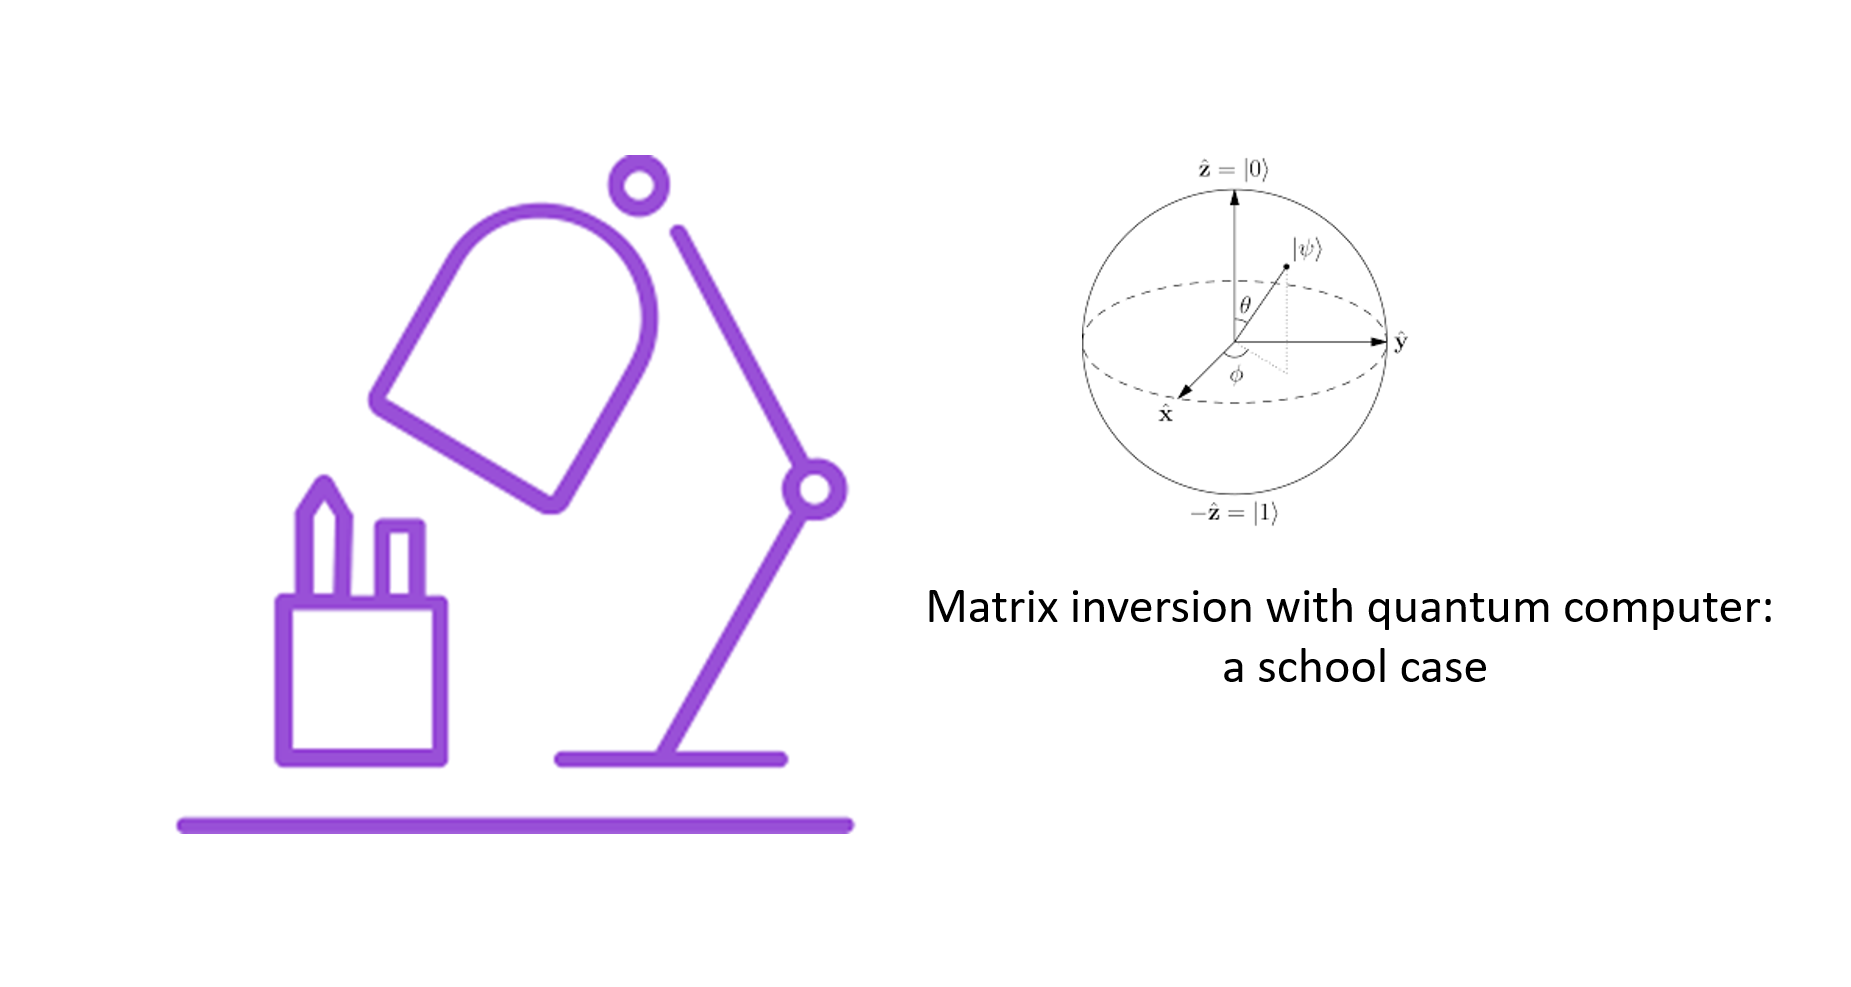
## Section 2 - Now let's take a look at the future: the Normal Solution using quantum computer
by Ennio Picarelli

As we known, nowadays, quantum computers have yet a reduced number of qubits (namely unit of calculus). We will use the IBM Q which makes available to anyone (for free) up to 14 qubits. Considering the amplification effect of multiplication, no more than 3 qubit will be used as input for calculation. Consequently we will use a mixture of classic and quantum computation, limiting the usage of quantum computer just to the computation of 2x2 matrix determinant inside a function for matrix inversion. For the above reason (3 qubit limitation) we need to perform a rescaling of the input data and this will introduce, unavoidably, an error due to the approximation.

Starting from the libraries provided by Thomas Wong I developed a classical matrix inversion calculation and other simple related functions such as:

1) dec_mult: decimal multiplication

2) dec_sub: decimal subtraction

3) standardizeMatrix: matrix standardization (based on min, max of the values of a matrix) to take into account the 3 bit limitation of the quantum circuit

4) quantumDeterminant: determinant of a 2x2 matrix by using quantum computer

5) getMatrixMinor: extraction of a generic matrix minor on the base of raw and column indexes

6) getMatrixDeterminant: generic matrix determinant calculation based on Laplace expansion

7) getMatrixInverse: generation of the inverse matrix by calculating cofactors

## Let's install the quantum experience libraries

In [1]:
!pip install qiskit --quiet
!pip install qiskit-aqua --quiet
!pip install qiskit-chemistry --quiet

## Let's include the basic calculation libraries

These libraries are based on Toffoli and controlled phase gates: 

a) Quantum Fourier transform of a qubit of lenght n

b) Inverse Fourier transform

c) Controlled phase gate: uses entanglement

d) Quantum Fourier transform of q, controlled by p: uses superposition and entanglement

e) Inverse quantum Fourier transform of p, controlled by p.

In [2]:
from qiskit import QuantumCircuit, ClassicalRegister, QuantumRegister
from qiskit import execute, Aer
from math import pi
from qiskit import QuantumRegister
import numpy as np
# 
# We include the libraries provided in https://github.com/hkhetawat/QArithmetic by thomasgwong
# This libraries are based on Toffoli gates
# 
# Quantum Fourier transform of |q>, of length n.
def qft(circ, q, n):
    # Iterate through the target.
    for i in range(n,0,-1):
        # Apply the Hadamard gate to the target.
        circ.h(q[i-1])

        # Iterate through the control.
        for j in range(i-1,0,-1):
            circ.cu1(2*pi/2**(i-j+1), q[j-1], q[i-1])

# Inverse Fourier transform of |q>, of length n.
def iqft(circ, q, n):
    # Iterate through the target.
    for i in range(1,n+1):
        # Iterate through the control.
        for j in range(1,i):
            # The inverse Fourier transform just uses a negative phase.
            circ.cu1(-2*pi/2**(i-j+1), q[j-1], q[i-1])

        # Apply the Hadamard gate to the target.
        circ.h(q[i-1])

# Controlled-controlled phase gate with phase theta.
# a and b are the controls, and c is the target.
def ccu1(circ, theta, a, b, c):
    circ.cu1(theta/2, b, c)
    circ.cx(a, b)
    circ.cu1(-theta/2, b, c)
    circ.cx(a, b)
    circ.cu1(theta/2, a, c)

# Quantum Fourier transform of q, controlled by p.
def cqft(circ, p, q, n):
    # All the operators are controlled by p.

    # Iterate through the target.
    for i in range(n,0,-1):
        # Apply the Hadamard gate to the target.
        circ.ch(p, q[i-1])

        # Iterate through the control.
        for j in range(i-1,0,-1):
            ccu1(circ, 2*pi/2**(i-j+1), p, q[j-1], q[i-1])

# Inverse quantum Fourier transform of p, controlled by p.
def ciqft(circ, p, q, n):
    # Iterate through the target.
    for i in range(1,n+1):
        # Iterate through the control.
        for j in range(1,i):
            ccu1(circ, -2*pi/2**(i-j+1), p, q[j-1], q[i-1])

        # Apply the Hadamard gate to the target.
        circ.ch(p, q[i-1])

## Now we include the classic operation simulation functions

All these libraries provide in output not only the result of the operation but also one or all the inputs. In fact they are reversible circuits.

These libraries are: 

a) Sum circuits

b) Controlled sum circuit (uses entanglement)

c) Subtraction circuit

d) Subtraction circuit with swap of the output

e) Subtraction circuit with sign (if the first number is minor than the second)

f) Subtraction circuit with sign and the restitution of all input values in output

g) Multiplication circuit

In [3]:
# Draper adder that takes |a>|b> to |a>|a+b>.
# |a> has length n+1 (left padded with a zero).
# |b> has length n+1 (left padded with a zero).
# https://arxiv.org/pdf/quant-ph/0008033.pdf
################################################################################
# Sum Circuits
################################################################################
def add(circ, a, b, n):
    # Take the QFT.
    qft(circ, b, n)

    # Compute controlled-phases.
    # Iterate through the targets.
    for i in range(n,0,-1):
        # Iterate through the controls.
        for j in range(i,0,-1):
            circ.cu1(2*pi/2**(i-j+1), a[j-1], b[i-1])

    # Take the inverse QFT.
    iqft(circ, b, n)
#    print(circ)
def cadd(circ, c, a, b, n):
    # Take the QFT.
    cqft(circ, c, b, n)

    # Compute controlled-phases.
    # Iterate through the targets.
    for i in range(n,0,-1):
        # Iterate through the controls.
        for j in range(i,0,-1):
            ccu1(circ, 2*pi/2**(i-j+1), c, a[j-1], b[i-1])

    # Take the inverse QFT.
    ciqft(circ, c, b, n)
    
################################################################################
# Subtraction Circuits
################################################################################

# Subtractor that takes |a>|b> to |a>|a-b>.
# |a> has length n+1 (left padded with a zero).
# |b> has length n+1 (left padded with a zero).
def sub(circ, a, b, n):
    # Flip the bits of a.
    circ.x(a)

    # Add it to b.
    add(circ, a, b, n)

    # Flip the bits of the result. This yields the sum.
    circ.x(b)

    # Flip back the bits of a.
    circ.x(a)

# Subtractor that takes |a>|b> to |a-b>|b>.
# |a> has length n+1 (left padded with a zero).
# |b> has length n+1 (left padded with a zero).
def sub_swap(circ, a, b, n):
    # Flip the bits of a.
    circ.x(a)

    # Add it to b.
    add(circ, b, a, n)

    # Flip the bits of the result. This yields the sum.
    circ.x(a)

# Subtractor that takes |a>|b> to |a>|a-b>.
# |a> has length n.
# |b> has length n+1.
def sub_ripple(circ, a, b, n):
    # We add "a" to the 2's complement of "b."
    # First flip the bits of "b."
    circ.x(b)

    # Create a carry register of length n.
    c = QuantumRegister(n)
    circ.add_register(c)

    # Add 1 to the carry register, which adds 1 to b, negating it.
    circ.x(c[0])

    # Calculate all the carries except the last one.
    for i in range(0, n-1):
        carry(circ, c[i], a[i], b[i], c[i+1])

    # The last carry bit is the leftmost bit of the sum.
    carry(circ, c[n-1], a[n-1], b[n-1], b[n])

    # Calculate the second-to-leftmost bit of the sum.
    circ.cx(c[n-1],b[n-1])

    # Invert the carries and calculate the remaining sums.
    for i in range(n-2,-1,-1):
        carry_dg(circ, c[i], a[i], b[i], c[i+1])
        sum(circ, c[i], a[i], b[i])

    # Flip the carry to restore it to zero.
    circ.x(c[0])


# Subtractor that takes |a>|b>|0> to |a>|b>|a-b>.
# |a> has length n.
# |b> has length n.
# |s> = |0> has length n+1.
def sub_ripple_ex(circ, a, b, s, n):
    # Copy b to s.
    for i in range(0, n):
        circ.cx(b[i],s[i])

    # Subtract a and s.
    sub_ripple(circ, a, s, n)

################################################################################
# Multiplication Circuit
################################################################################

# Controlled operations

# Take a subset of a quantum register from index x to y, inclusive.
def sub_qr(qr, x, y):
    sub = []
    for i in range (x, y+1):
        sub = sub + [(qr, i)]
    return sub

# Computes the product c=a*b.
# a has length n.
# b has length n.
# c has length 2n.
def mult(circ, a, b, c, n):
    for i in range (0, n):
        cadd(circ, a[i], b, sub_qr(c, i, n+i), n)

## Decimal implementation of multiplication (because we usually work with decimal numbers...)

In [4]:
from qiskit import QuantumCircuit, ClassicalRegister, QuantumRegister
from qiskit import execute, Aer
# Because we need to manage decimal numbers we introduce the decimal functions 
# numero1 and numero2 are decimal numbers from 0 to 7 (because the reserved Qregister has lenght 3).
def dec_mult(numero1,numero2):
    a = QuantumRegister(3)
    b = QuantumRegister(3)
    m = QuantumRegister(6)
    cm = ClassicalRegister(6)
    qc = QuantumCircuit(a, b, m, cm)
    if (numero1<numero2):
        numero=numero1
        numero1=numero2
        numero2=numero
#   We convert the decimal input numbers into binary strings
    binario1=bin(numero1)  
    binario2=bin(numero2)
#   we get the lenght of the binary strings which have the form 0b1234
    i1=len(binario1)
    i2=len(binario2)
# We set the input qbit by putting not gate on the qubit set to 1.
    for k in range(3,i1+1):
        if(binario1[k-1] == '1'):
            qc.x(a[i1-k])
    for j in range(3,i2+1):
        if(binario2[j-1] == '1'):
            qc.x(b[i2-j])

# We multiply the numbers, so |a>|b>|m=0> to |a>|b>|a*b>.
    mult(qc, a, b, m, 3)

# We measure the result.
    qc.measure(m, cm)

# We use Qasm simulator.
    backend_sim = Aer.get_backend('qasm_simulator')
    job_sim = execute(qc, backend_sim)
    result_sim = job_sim.result()   
    resultstr=(result_sim.get_counts(qc))
#    we convert result into binary string 
    strresult=str(resultstr)
#   we convert back binary string into decimal numbers
    decmult=int('0b'+strresult[2:8],2)
#  return the decimal result
    return decmult

## Decimal implementation of subtraction.

It takes into account the relative numbers, that is the case in which the first number is minor than the second one by putting a - sign

In [5]:
from qiskit import QuantumCircuit, ClassicalRegister, QuantumRegister
from qiskit import execute, Aer
# Because we need to manage decimal numbers I introduce the decimal functions 
# numero1 and numero2 are decimal numbers from -31 to +31 (because the reserved Qregister has lenght 5).
# 
def dec_sub(numero1,numero2):
    a = QuantumRegister(5)
    b = QuantumRegister(5)
    ca = ClassicalRegister(5)
    cb = ClassicalRegister(5)
    qc = QuantumCircuit(a, b, ca, cb)
#   We convert the decimal input numbers into binary strings
    binario1=bin(numero1)
    binario2=bin(numero2)
#   we get the lenght of the binary strings which have the form 0b123456
    i1=len(binario1)
    i2=len(binario2)
# We set the input qbit by putting not gate on the qubit set to 1.
    for k in range(3,i1+1):
        if(binario1[k-1] == '1'):
            qc.x(a[i1-k])
    for j in range(3,i2+1):
        if(binario2[j-1] == '1'):
            qc.x(b[i2-j])
# Sub the numbers, so |a>|b> to |a>|a-b> considering the sign.
    if (numero1>=numero2):
        sub(qc, a, b, 5)
        # Measure the results.
        qc.measure(a, ca)
        qc.measure(b, cb)
    else:
        sub(qc, b, a, 5)
        # Measure the results.
        qc.measure(b, ca)
        qc.measure(a, cb)
# We measure the results.

# We use Qasm simulator.
    backend_sim = Aer.get_backend('qasm_simulator')
    job_sim = execute(qc, backend_sim)
    result_sim = job_sim.result()
    resultstr=(result_sim.get_counts(qc))
#    we convert result into binary string 
    strresult=str(resultstr)
#   we convert back binary string into decimal numbers
    diff=int('0b'+strresult[2:7],2)
#  return the decimal result with sign
    if (numero1>=numero2):
        return diff
    else:      
        return -diff

## Quantum determinant function of a 2x2 matrix

In [6]:
#
def quantumDeterminant(m):
       print('elaborating 2x2 determinant of',m)
# no advantage school case matrix determinant calculation based on quantum multiplication and subtraction
       return dec_sub(dec_mult(int(m[0,0]),int(m[1,1])),dec_mult(int(m[0,1]),int(m[1,0])))

## Additional ancillar functions for Matrix inversion calculation:

1) maxmin ---> calculates the max and min element of a matrix

2) standardizeMatrix ----> executes a scaling of matrix element on the basis of a) max and min; b) maximum number value admitted

3) getMatrixMinor -----> extracts a submatrice of (n-1)x(n-1) corresponding to the suppression of the i-th raw and j-th column

4) getMatrixDeterminant --> calculates the nxn matrix determinant with L-expansion $det(𝐴)=\sum_{𝑗=1}^{𝑛} 𝑎_{(𝑖,j)}  𝐶_{(𝑖.𝑗)}$ where $𝐶_{(𝑖,𝑗)}$, cofactor of A, is defined as the product $−1^{(𝑖+𝑗)} 𝑀_{(𝑖,𝑗)}$, where $𝑀_{(𝑖,𝑗)}$ is the determinant of the matrix obtained from A by eliminating the i-th row and the j-th column. So, the calculation of det(A) is reduced to the calculation of det(M), which is an (n-1)x(n-1)  matrix. The det(𝐴) can be calculated by proceeding iteratively (recursively) until the 2x2 matrix is obtained. The 2x2 matrix determinant is obtained by using the previous quantumDeterminant function
 
5) getMatrixInverse ---> calculates the inverse matrix of a given one

In [7]:
import numpy as np
# calculation of max an min of all element in a matrix
# 
def maxmin(m):
# The function works for any matrix size
        a=np.zeros([len(m),2])
        b=[np.zeros([2]),1]
        for l in range(len(m)):
            a[l,0]=max(m[l,])
            a[l,1]=min(m[l,])
        c=max(a[:,0])
        b[0]=c
        c=min(a[:,1])
        b[1]=c
        return b

In [8]:
from statistics import mean
# Because we have a generic data matrix we need to 'scale out' in order to reduce the values in the range 0,7 which is the limit of
# quantum register calculation function based on 3 bit factors. Parameters: m=matrix, max_min=array of max,min for each matrix column,
# maxnumber=maximum number available for calculation (in this case 7) 
def standardizeMatrix(m,max_min,maxnumber):
# We make a scaling of the matrix. The function works for 
# any matrix size
        m=np.matrix.transpose(m)
        a=max_min
        mymatrix=np.zeros([len(m),len(m)])
        print('mymatrix',mymatrix)
        for k in range(len(m)):
            for l in range(len(m)):
                mymatrix[k,l]=int(((m[l,k])/(a[0]-a[1]))*maxnumber)
#        
        return mymatrix

In [9]:
import numpy as np

#def transposeMatrix(m):
#    mt=np.zeros([len(m),len(m)])
#    for i in range(len(m)):
#        for j in range(len(m)):
#            mt[i,j]=m[j,i]
#    return mt

def getMatrixMinor(m,i,j):
    a=np.zeros([len(m)-1,len(m)-1])
#    print('i,j=',i,j)
    p=0
    q=0
    for k in range(len(m)):
        for l in range(len(m)):
            if (k != i and l != j):
#                print('k,l',k,l)
#                print('p,q=',p,q)
                a[p,q]=m[k,l]
                if(l!=j): q=q+1
                if (q==len(m)-1): q=0
        if (k!=i): p=p+1
        if (p==len(m)-1): p=p-1
#    print('minor di',i,j,'=',a)
    return a

def getMatrixDeterminant(m):
    #base case for 2x2 matrix
    if len(m) == 2:
        determinant=quantumDeterminant(m)
        print('determinante=',determinant)
#        determinant=m[0,0]*m[1,1]-m[0,1]*m[1,0]
# 
        return determinant

    determinant = 0
    for c in range(len(m)):
        determinant += ((-1)**c)*m[0,c]*getMatrixDeterminant(getMatrixMinor(m,0,c))
#        print('determinant=',determinant)
    return determinant

def getMatrixInverse(m):
    determinant = getMatrixDeterminant(m)
    #special case for 2x2 matrix:
    if len(m) == 2:
        return [[m[1,1]/determinant, -1*m[0,1]/determinant],
                [-1*m[1,0]/determinant, m[0,0]/determinant]]

    #find matrix of cofactors
    cofactors = np.zeros([len(m),len(m)])
    for r in range(len(m)):
        for c in range(len(m)):
            minor = getMatrixMinor(m,r,c)
            cofactors[r,c] = ((-1)**(r+c)) * getMatrixDeterminant(minor)
    cofactors = np.transpose(cofactors)
    for r in range(len(cofactors)):
        for c in range(len(cofactors)):
            cofactors[r,c] = cofactors[r,c]/determinant
#            cofactors[r,c] = cofactors[r,c]
    return cofactors

## Let's put all together:

Starting from $\theta=(X^TX)^-1X^Ty$ we calculate classically $X^TX$. This provides a generic 3x3 matrix.

We use the minmax function to get the min and max values and then we call the function standardizeMatrix which returns an integer scaled matrix 
with values from 0 to 7.

Then we call the getMatrixInverse in order to obtain the inverse of the standardized. 

Then we de-standardize the inverse obtaining an approximated inverse of the original matrix (the approximation depends on the variance of the values in the matrix).

We complete the elaboration providing the q-calculated theta and we use it to perform the price prediction.


In [10]:
import sys
import types
import pandas as pd
from ibm_botocore.client import Config
import ibm_boto3

def __iter__(self): return 0

# @hidden_cell
# The following code accesses a file in your IBM Cloud Object Storage. It includes your credentials.
# You might want to remove those credentials before you share your notebook.
client_6e66e2db78b04f06a0fb0a77e04e36f5 = ibm_boto3.client(service_name='s3',
    ibm_api_key_id='c-XvXnUYEDK6D9_FLsF0UsEKMJhaXv3NhZHxOFQrglki',
    ibm_auth_endpoint="https://iam.bluemix.net/oidc/token",
    config=Config(signature_version='oauth'),
    endpoint_url='https://s3.eu-geo.objectstorage.service.networklayer.com')

body = client_6e66e2db78b04f06a0fb0a77e04e36f5.get_object(Bucket='prova-donotdelete-pr-htwa8abspyrjpu',Key='ex1data2.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

df_data_1 = pd.read_csv(body)
df_data_1.head()
X=df_data_1.values[:,0:2]*1.
y=df_data_1.values[:,2]*1.

m=len(y)
# we can rescale the price dividing by 1000. and so expressing the price as k$
X[:,0]=X[:,0]/1000.

z = np.ones([len(X[:,0]),1])

X=np.column_stack((z, X))

XTX=np.dot(np.transpose(X),X)
print('XTX=',XTX)
bb=(maxmin(XTX))
print('bb=',bb)
#aa=np.array([[0,0,0],[0,0,0],[0,0,0]])
aa=(standardizeMatrix(XTX,bb,7))
print('aa=',aa)
ii=getMatrixInverse(aa)
print('ii=',ii)


XTX= [[  47.         94.032     149.      ]
 [  94.032     217.179406  313.679   ]
 [ 149.        313.679     499.      ]]
bb= [499.0, 47.0]
mymatrix [[ 0.  0.  0.]
 [ 0.  0.  0.]
 [ 0.  0.  0.]]
aa= [[ 0.  1.  2.]
 [ 1.  3.  4.]
 [ 2.  4.  7.]]
elaborating 2x2 determinant of [[ 3.  4.]
 [ 4.  7.]]
determinante= 5
elaborating 2x2 determinant of [[ 1.  4.]
 [ 2.  7.]]
determinante= -1
elaborating 2x2 determinant of [[ 1.  3.]
 [ 2.  4.]]
determinante= -2
elaborating 2x2 determinant of [[ 3.  4.]
 [ 4.  7.]]
determinante= 5
elaborating 2x2 determinant of [[ 1.  4.]
 [ 2.  7.]]
determinante= -1
elaborating 2x2 determinant of [[ 1.  3.]
 [ 2.  4.]]
determinante= -2
elaborating 2x2 determinant of [[ 1.  2.]
 [ 4.  7.]]
determinante= -1
elaborating 2x2 determinant of [[ 0.  2.]
 [ 2.  7.]]
determinante= -4
elaborating 2x2 determinant of [[ 0.  1.]
 [ 2.  4.]]
determinante= -2
elaborating 2x2 determinant of [[ 1.  2.]
 [ 3.  4.]]
determinante= -2
elaborating 2x2 determinant of [[ 0.  2.]
 [ 1

In [19]:
# We de-standardize the inverse matrix adjusting the factor in order to take into account the lost decimal values 
inversa=ii*6./(bb[0]-bb[1])
theta2=np.dot(inversa,np.transpose(X))
theta2=np.dot(theta2,y)
print('theta=',theta2)

# Estimate the price of a 1650 sq-ft, 3 br house
price = theta2[0]+theta2[1]*1.650+theta2[2]*3
print('Predicted price of a 1650 sq-ft, 3 br house (using Quantum computing):', price)

TEST INVERSA= [[  1.00000000e+00  -4.44089210e-16  -5.55111512e-16]
 [  0.00000000e+00   1.00000000e+00  -3.33066907e-16]
 [  0.00000000e+00  -2.22044605e-16   1.00000000e+00]]
theta= [-46903.71692478  98926.35884956  56727.49535398]
Predicted price of a 1650 sq-ft, 3 br house (using Quantum computing): 286507.261239
